<a href="https://colab.research.google.com/github/Dianaj30/Predicciones/blob/main/Proyecto_final_parte4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROYECTO MENTAL HEALTH

#Diccionario

- Timestamp: Time and date of survey
- Gender:Gender of the respondent
- Country: The country where the respondent lives
- Occupation: Occupation or profession of the respondent
- self_employed: Is the respondent self-employed or not?
- family_history: Is there a history of mental health disorders in the respondent's family?
- treatment: Has the respondent ever received treatment or therapy for mental health problems?
- Days_Indoors: Estimated number of days a week the respondent spends indoors.
- Growing_Stress: The current level of stress the respondent feels
- Changes_Habits: Has the respondent experienced any changes in sleeping habits or patterns?
- Mental_Health_History: Does the respondent have a previous history of mental health disorders?
- Mood_Swings:Does the respondent experience sudden mood swings?
- Coping_Struggles: Does the respondent have difficulty coping with pressure or stress?
- Work_Interest: The respondent's level of interest and motivation in their work
- Social_Weakness: Does the respondent find it difficult to interact socially or maintain relationships?
- mental_health_interview: Is the respondent willing to be interviewed about their mental health?
- care_options: Is the respondent aware of or using mental health care options?

Variable objetivo: Coping_Struggles: Does the respondent have difficulty coping with pressure or stress?

In [216]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [219]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [324]:

from sklearn.tree import DecisionTreeClassifier

In [325]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [220]:
filename = '/content/drive/MyDrive/CODING DOJO-BOOTCAMP DATA ANALYTICS/Mental Health Dataset.csv'
df = pd.read_csv(filename)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


#1.Limpieza de datos

##1.1 Duplicados

In [221]:
df.duplicated().sum()

363

In [222]:
df.drop_duplicates(inplace=True)

Se encuentran 363 valores duplicados, por lo que se eliminaron

##1.2 Valores nulos

In [223]:
df.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5193
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [224]:
(5193 / 292364) * 100

1.7762104773501524

In [225]:
df.dropna(subset=['self_employed'], inplace=True)

Los valores nulos se encuentran en la columna "Self_employed" y representan solo el 1.7% del total de la data, por lo que las filas de valores nulos se están eliminando.

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286808 entries, 3 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                286808 non-null  object
 1   Gender                   286808 non-null  object
 2   Country                  286808 non-null  object
 3   Occupation               286808 non-null  object
 4   self_employed            286808 non-null  object
 5   family_history           286808 non-null  object
 6   treatment                286808 non-null  object
 7   Days_Indoors             286808 non-null  object
 8   Growing_Stress           286808 non-null  object
 9   Changes_Habits           286808 non-null  object
 10  Mental_Health_History    286808 non-null  object
 11  Mood_Swings              286808 non-null  object
 12  Coping_Struggles         286808 non-null  object
 13  Work_Interest            286808 non-null  object
 14  Social_Weakness          

In [227]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,2014-08-27 11:49:51,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,2014-08-27 11:51:34,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,2014-08-27 11:52:41,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


##1.3Valores a número

###Genero

In [228]:
df['Gender'].value_counts()

Gender
Male      235950
Female     50858
Name: count, dtype: int64

In [229]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

In [230]:
df['Gender'].value_counts()

Gender
0    235950
1     50858
Name: count, dtype: int64

Variable categórica

###Pais

In [231]:
df['Country'].value_counts()

Country
United States             167819
United Kingdom             50576
Canada                     17529
Australia                   6014
Netherlands                 5891
Ireland                     5542
Germany                     4680
Sweden                      2812
India                       2771
France                      2340
Brazil                      2340
New Zealand                 1991
South Africa                1991
Switzerland                 1560
Israel                      1560
Italy                       1560
Belgium                      821
Poland                       821
Russia                       780
Denmark                      780
Singapore                    780
Greece                       780
Czech Republic               390
Georgia                      390
Colombia                     390
Moldova                      390
Mexico                       390
Croatia                      390
Thailand                     390
Nigeria                      390
Bo

Variables categórica. Hace referencia al país donde viven

###Ocupación

In [232]:
df['Occupation'].value_counts()

Occupation
Housewife    65173
Student      60569
Corporate    60039
Others       51775
Business     49252
Name: count, dtype: int64

Variable categórica. Hace referencia a la ocupación u otros.

In [233]:
df['Occupation'] = df['Occupation'].replace({
    'Housewife': 1,
    'Student': 2,
    'Corporate': 3,
    'Others': 4,
    'Business': 5
})

In [234]:
df['Occupation'].value_counts()

Occupation
1    65173
2    60569
3    60039
4    51775
5    49252
Name: count, dtype: int64

###Autónomo

In [235]:
df['self_employed'].value_counts()

self_employed
No     257661
Yes     29147
Name: count, dtype: int64

In [236]:
df['self_employed'] = df['self_employed'].replace({'No': 1, 'Yes': 3})

In [237]:
df['self_employed'].value_counts()

self_employed
1    257661
3     29147
Name: count, dtype: int64

Variable categórica: Trabajan de forman autónoma o no. 1=NO, 3=SI

###Historia Familiar

In [238]:
df['family_history'].value_counts()

family_history
No     173527
Yes    113281
Name: count, dtype: int64

In [239]:
df['family_history'] = df['family_history'].replace({'No': 1, 'Yes': 3})

In [240]:
df['family_history'].value_counts()

family_history
1    173527
3    113281
Name: count, dtype: int64

Variable categórica: Hay historia de la familia que hayan tenido problemas de salud mental. 1=no, 3=si

###Tratamiento

In [241]:
df['treatment'].value_counts()

treatment
Yes    144501
No     142307
Name: count, dtype: int64

In [242]:
df['treatment'] = df['treatment'].replace({'No': 1, 'Yes': 3})

Variable categórica: Ha recibido o no tratatamiento o terapia por problemas de salud mental. 1=NO, 3=SI

###Dias dentro de casa

In [243]:
df['Days_Indoors'].value_counts()

Days_Indoors
1-14 days             62429
31-60 days            59389
Go out Every day      57323
More than 2 months    54800
15-30 days            52867
Name: count, dtype: int64

In [244]:
df['Days_Indoors']= df['Days_Indoors'].replace ({
    '1-14 days': 1,
    '15-30 days': 2,
    '31-60 days': 3,
    'More than 2 months': 4,
    'Go out Every day': 5
})

In [245]:
df['Days_Indoors'].value_counts()

Days_Indoors
1    62429
3    59389
5    57323
4    54800
2    52867
Name: count, dtype: int64

Variable categórica: número de días a la semana que el participante pasa dentro de casa.
- 1= 1-14 days
- 2= 15-30 days
- 3 = 31-60 days
- 4 = More than 2 months
- 5 = Go out Every day

###Aumento de estrés

Variable categórica: el actual nivel de estrés que siente el participante. ¿Ha aumentado? ¿Ha disminuido? El estrés ha dio creciendo.

In [246]:
df['Growing_Stress'].value_counts()

Growing_Stress
Maybe    98225
Yes      97618
No       90965
Name: count, dtype: int64

In [247]:
df['Growing_Stress'] = df['Growing_Stress'].replace({'No': 1, 'Maybe': 2, 'Yes': 3})

In [248]:
df['Growing_Stress'].value_counts()

Growing_Stress
2    98225
3    97618
1    90965
Name: count, dtype: int64

###Cambio de hábitos

In [249]:
df['Changes_Habits'].value_counts()

Changes_Habits
Yes      107579
Maybe     93237
No        85992
Name: count, dtype: int64

In [250]:
df['Changes_Habits'] = df['Changes_Habits'].replace({'No': 1, 'Maybe': 2, 'Yes': 3})

In [251]:
df['Changes_Habits'].value_counts()

Changes_Habits
3    107579
2     93237
1     85992
Name: count, dtype: int64

Variable categórica: El participantes ha experiemntado cambios en los patrones y/o hábitos de sueño.

###Historia relacionada a problemas de salud mental

In [252]:
df['Mental_Health_History'].value_counts()

Mental_Health_History
No       102179
Maybe     93428
Yes       91201
Name: count, dtype: int64

In [253]:
df['Mental_Health_History'] = df['Mental_Health_History'].replace({'No': 1, 'Maybe': 2, 'Yes': 3})

In [254]:
df['Mental_Health_History'].value_counts()

Mental_Health_History
1    102179
2     93428
3     91201
Name: count, dtype: int64

Variable categórica: El participante ha tenido historia pasada relacionada a problemas de salud mental

###Cambios de humor

In [255]:
df['Mood_Swings'].value_counts()

Mood_Swings
Medium    99272
Low       98062
High      89474
Name: count, dtype: int64

In [256]:
df['Mood_Swings'] = df['Mood_Swings'].replace({'Low': 1, 'Medium': 2, 'High': 3})

In [257]:
df['Mood_Swings'].value_counts()

Mood_Swings
2    99272
1    98062
3    89474
Name: count, dtype: int64

Variable ordinal: El participante ha experimentado algún cambio de humor?. ¿Experimenta el encuestado cambios de humor repentinos?

###Afrontamiento frente a problemas

In [258]:
df['Coping_Struggles'].value_counts()

Coping_Struggles
No     151373
Yes    135435
Name: count, dtype: int64

In [259]:
df['Coping_Struggles'] = df['Coping_Struggles'].replace({'No': 1 , 'Yes': 3})

In [260]:
df['Coping_Struggles'].value_counts()

Coping_Struggles
1    151373
3    135435
Name: count, dtype: int64

Variable categórica: ¿Ha tenido diificultad para afrontar con el estrés o presión? SI/NO

###Interés en el trabajo

In [261]:
df['Work_Interest'].value_counts()

Work_Interest
No       103846
Maybe     99272
Yes       83690
Name: count, dtype: int64

In [ ]:
df['Work_Interest'] = df['Work_Interest'].replace({'No': 1, 'Maybe': 2, 'Yes': 3})

In [262]:
df['Work_Interest'].value_counts()

Work_Interest
No       103846
Maybe     99272
Yes       83690
Name: count, dtype: int64

Variable categórica: Interés y motivación por el trabajo

###Dificultad para socializar

In [263]:
df['Social_Weakness'].value_counts()

Social_Weakness
Maybe    101441
No        95391
Yes       89976
Name: count, dtype: int64

In [264]:
df['Social_Weakness'] = df['Social_Weakness'].replace({'No': 1 , 'Maybe': 2, 'Yes': 3})

In [265]:
df['Social_Weakness'].value_counts()

Social_Weakness
2    101441
1     95391
3     89976
Name: count, dtype: int64

Variable categórica: Encuentra dificultad para intereacturar con otras personas o mantener relaciones interpersonales.

###Entrevista para salud mental

In [266]:
df['mental_health_interview'].value_counts()

mental_health_interview
No       228986
Maybe     49981
Yes        7841
Name: count, dtype: int64

In [267]:
df['mental_health_interview'] = df['mental_health_interview'].replace({'No': 1 , 'Maybe': 2, 'Yes': 3})

Variable categórica: Está dispuesto a ser entrevistado acerca de su salud mental

In [268]:
df['mental_health_interview'].value_counts()

mental_health_interview
1    228986
2     49981
3      7841
Name: count, dtype: int64

###Opciones de autocuidado

In [269]:
df['care_options'].value_counts()

care_options
No          116403
Yes          94357
Not sure     76048
Name: count, dtype: int64

In [270]:
df['care_options'] = df['care_options'].replace({'No': 1 , 'Not sure': 2, 'Yes': 3})

In [271]:
df['care_options'].value_counts()

care_options
1    116403
3     94357
2     76048
Name: count, dtype: int64

Variable categórica: Está consciente de las opciones de cuidado de salud mental o las está usando/realizando?

In [272]:
df.describe()

,Gender,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Social_Weakness,mental_health_interview,care_options
count,286808.000000,286808.000000,286808.000000,286808.000000,286808.000000,286808.000000,286808.000000,286808.000000,286808.000000,286808.000000,286808.000000,286808.000000,286808.000000,286808.000000
mean,0.177324,2.858316,1.203251,1.789943,2.007650,2.971134,2.023197,2.075266,1.961724,1.970057,1.944430,1.981120,1.228944,1.923133
std,0.381944,1.402668,0.604311,0.977691,0.999972,1.429932,0.810548,0.818078,0.820235,0.808071,0.998457,0.803714,0.480840,0.853780
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,3.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,0.000000,4.000000,1.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
max,1.000000,5.000000,3.000000,3.000000,3.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


#2.Exploración de datos

In [273]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,2014-08-27 11:37:59,1,United States,3,1,3,3,1,3,1,3,2,1,No,3,2,3
4,2014-08-27 11:43:36,1,United States,3,1,3,3,1,3,1,3,2,1,No,3,1,3
5,2014-08-27 11:49:51,1,Poland,3,1,1,3,1,3,1,3,2,1,No,3,2,2
6,2014-08-27 11:51:34,1,Australia,3,1,3,3,1,3,1,3,2,1,No,3,1,2
7,2014-08-27 11:52:41,1,United States,3,1,1,1,1,3,1,3,2,1,No,3,1,1


In [274]:
df_new = df.drop(columns=['Timestamp'])

In [275]:
df_new.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,1,United States,3,1,3,3,1,3,1,3,2,1,No,3,2,3
4,1,United States,3,1,3,3,1,3,1,3,2,1,No,3,1,3
5,1,Poland,3,1,1,3,1,3,1,3,2,1,No,3,2,2
6,1,Australia,3,1,3,3,1,3,1,3,2,1,No,3,1,2
7,1,United States,3,1,1,1,1,3,1,3,2,1,No,3,1,1


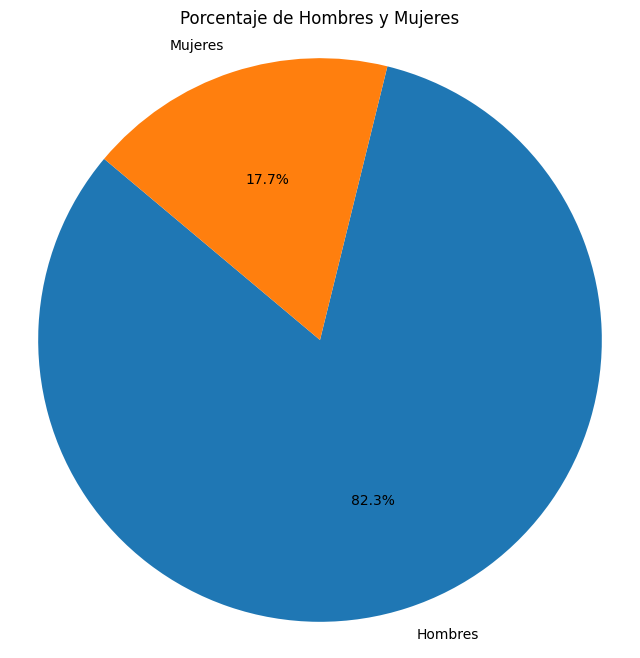

In [276]:
import matplotlib.pyplot as plt


conteo_genero = df['Gender'].value_counts()

etiquetas = ['Mujeres' if genero == 1 else 'Hombres' for genero in conteo_genero.index]


valores = conteo_genero.values


plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Hombres y Mujeres')
plt.axis('equal')
plt.show()

El mayor porcentaje de la población son hombre 82%, mientras que el 17,17% son mujeres. En este sentido es importante analizar que en cuestión de representación de mujeres es baja en comparación con los varones.

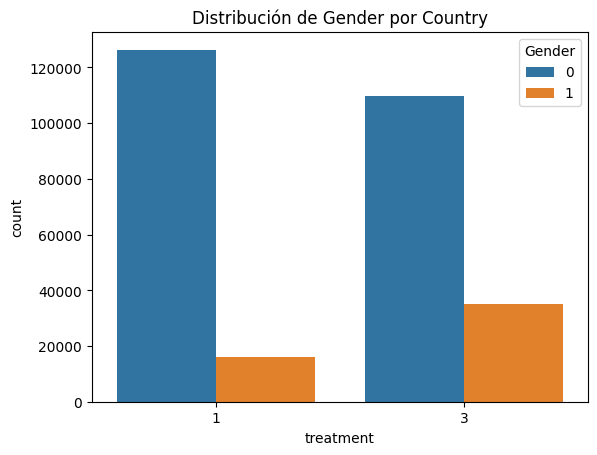

In [277]:
# Supongamos que tienes un DataFrame df con tus variables

# Crear un gráfico de barras apiladas para visualizar la distribución de 'Country' por 'Gender'
sns.countplot(x='treatment', hue='Gender', data=df)
plt.title('Distribución de Gender por Country')
plt.show()

In [ ]:
pip install pandas plotly

In [ ]:
import plotly.express as px


# Crear un DataFrame con los datos del conteo de países
data = {
    'Country': ['United States', 'United Kingdom', 'Canada', 'Australia', 'Netherlands', 'Ireland', 'Germany', 'Sweden', 'India', 'France',
                'Brazil', 'New Zealand', 'South Africa', 'Switzerland', 'Israel', 'Italy', 'Belgium', 'Poland', 'Russia', 'Denmark',
                'Singapore', 'Greece', 'Czech Republic', 'Georgia', 'Colombia', 'Moldova', 'Mexico', 'Croatia', 'Thailand', 'Nigeria',
                'Bosnia and Herzegovina', 'Portugal', 'Finland', 'Costa Rica', 'Philippines'],
    'Count': [167819, 50576, 17529, 6014, 5891, 5542, 4680, 2812, 2771, 2340, 2340, 1991, 1991, 1560, 1560, 1560, 821, 821, 780, 780,
              780, 780, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390]
}

# Verificar que ambas listas tienen la misma longitud
assert len(data['Country']) == len(data['Count']), "Las listas 'Country' y 'Count' deben tener la misma longitud."

# Crear el DataFrame
df = pd.DataFrame(data)

# Crear el mapa de coropletas
fig = px.choropleth(df, locations="Country", locationmode='country names',
                    color="Count", hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Distribución de respuestas por país")

fig.show()

In [ ]:
data = {
    'Country': ['United States', 'United Kingdom', 'Canada', 'Australia', 'Netherlands', 'Ireland', 'Germany', 'Sweden', 'India', 'France',
                'Brazil', 'New Zealand', 'South Africa', 'Switzerland', 'Israel', 'Italy', 'Belgium', 'Poland', 'Russia', 'Denmark',
                'Singapore', 'Greece', 'Czech Republic', 'Georgia', 'Colombia', 'Moldova', 'Mexico', 'Croatia', 'Thailand', 'Nigeria',
                'Bosnia and Herzegovina', 'Portugal', 'Finland', 'Costa Rica', 'Philippines'],
    'Count': [167819, 50576, 17529, 6014, 5891, 5542, 4680, 2812, 2771, 2340, 2340, 1991, 1991, 1560, 1560, 1560, 821, 821, 780, 780,
              780, 780, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390]
}

df = pd.DataFrame(data)

# Calcular el total de respuestas
total_respuestas = df['Count'].sum()

# Calcular el umbral del 60%
umbral_60 = 0.60 * total_respuestas

# Determinar qué países tienen más del 60% de las respuestas
paises_superan_60 = df[df['Count'] > umbral_60]

print("Países que tienen más del 60% de la data:")
print(paises_superan_60)

Países que tienen más del 60% de la data:
Empty DataFrame
Columns: [Country, Count]
Index: []


In [ ]:
# Calcular el porcentaje de respuestas para cada país
df['Percentage'] = (df['Count'] / total_respuestas) * 100

# Ordenar los países por porcentaje de respuestas en orden descendente
df_sorted = df.sort_values(by='Percentage', ascending=False)

# Mostrar los países con los mayores porcentajes de respuestas
print(df_sorted)

                   Country   Count  Percentage
0            United States  167819   58.512664
1           United Kingdom   50576   17.634097
2                   Canada   17529    6.111754
3                Australia    6014    2.096873
4              Netherlands    5891    2.053987
5                  Ireland    5542    1.932303
6                  Germany    4680    1.631754
7                   Sweden    2812    0.980447
8                    India    2771    0.966152
9                   France    2340    0.815877
10                  Brazil    2340    0.815877
11             New Zealand    1991    0.694193
12            South Africa    1991    0.694193
13             Switzerland    1560    0.543918
14                  Israel    1560    0.543918
15                   Italy    1560    0.543918
17                  Poland     821    0.286254
16                 Belgium     821    0.286254
19                 Denmark     780    0.271959
20               Singapore     780    0.271959
21           

In [ ]:
data = {
    'Country': ['United States', 'United Kingdom', 'Canada', 'Australia', 'Netherlands', 'Ireland', 'Germany', 'Sweden', 'India', 'France',
                'Brazil', 'New Zealand', 'South Africa', 'Switzerland', 'Israel', 'Italy', 'Belgium', 'Poland', 'Russia', 'Denmark',
                'Singapore', 'Greece', 'Czech Republic', 'Georgia', 'Colombia', 'Moldova', 'Mexico', 'Croatia', 'Thailand', 'Nigeria',
                'Bosnia and Herzegovina', 'Portugal', 'Finland', 'Costa Rica', 'Philippines'],
    'Count': [167819, 50576, 17529, 6014, 5891, 5542, 4680, 2812, 2771, 2340, 2340, 1991, 1991, 1560, 1560, 1560, 821, 821, 780, 780,
              780, 780, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390],
    'Highlight': ['Top 3' if country in ['United States', 'United Kingdom', 'Canada'] else 'Others' for country in ['United States', 'United Kingdom', 'Canada', 'Australia', 'Netherlands', 'Ireland', 'Germany', 'Sweden', 'India', 'France', 'Brazil', 'New Zealand', 'South Africa', 'Switzerland', 'Israel', 'Italy', 'Belgium', 'Poland', 'Russia', 'Denmark', 'Singapore', 'Greece', 'Czech Republic', 'Georgia', 'Colombia', 'Moldova', 'Mexico', 'Croatia', 'Thailand', 'Nigeria', 'Bosnia and Herzegovina', 'Portugal', 'Finland', 'Costa Rica', 'Philippines']]
}

df = pd.DataFrame(data)

# Crear el mapa de coropletas
fig = px.choropleth(df, locations="Country", locationmode='country names',
                    color="Highlight", hover_name="Country",
                    color_discrete_map={'Top 3': 'red', 'Others': 'blue'},
                    title="Distribución de respuestas por país resaltando los tres principales")

fig.show()

Más del 60% de los participantes viven en Estados Unidos, canadá y Reino Unido.

In [ ]:
df['Percentage'] = (df['Count'] / total_respuestas) * 100

# Ordenar los países por porcentaje de respuestas en orden descendente
df_sorted = df.sort_values(by='Percentage', ascending=False)

# Mostrar los países con los mayores porcentajes de respuestas
print(df_sorted)

                   Country   Count Highlight  Percentage
0            United States  167819     Top 3   58.512664
1           United Kingdom   50576     Top 3   17.634097
2                   Canada   17529     Top 3    6.111754
3                Australia    6014    Others    2.096873
4              Netherlands    5891    Others    2.053987
5                  Ireland    5542    Others    1.932303
6                  Germany    4680    Others    1.631754
7                   Sweden    2812    Others    0.980447
8                    India    2771    Others    0.966152
9                   France    2340    Others    0.815877
10                  Brazil    2340    Others    0.815877
11             New Zealand    1991    Others    0.694193
12            South Africa    1991    Others    0.694193
13             Switzerland    1560    Others    0.543918
14                  Israel    1560    Others    0.543918
15                   Italy    1560    Others    0.543918
17                  Poland     

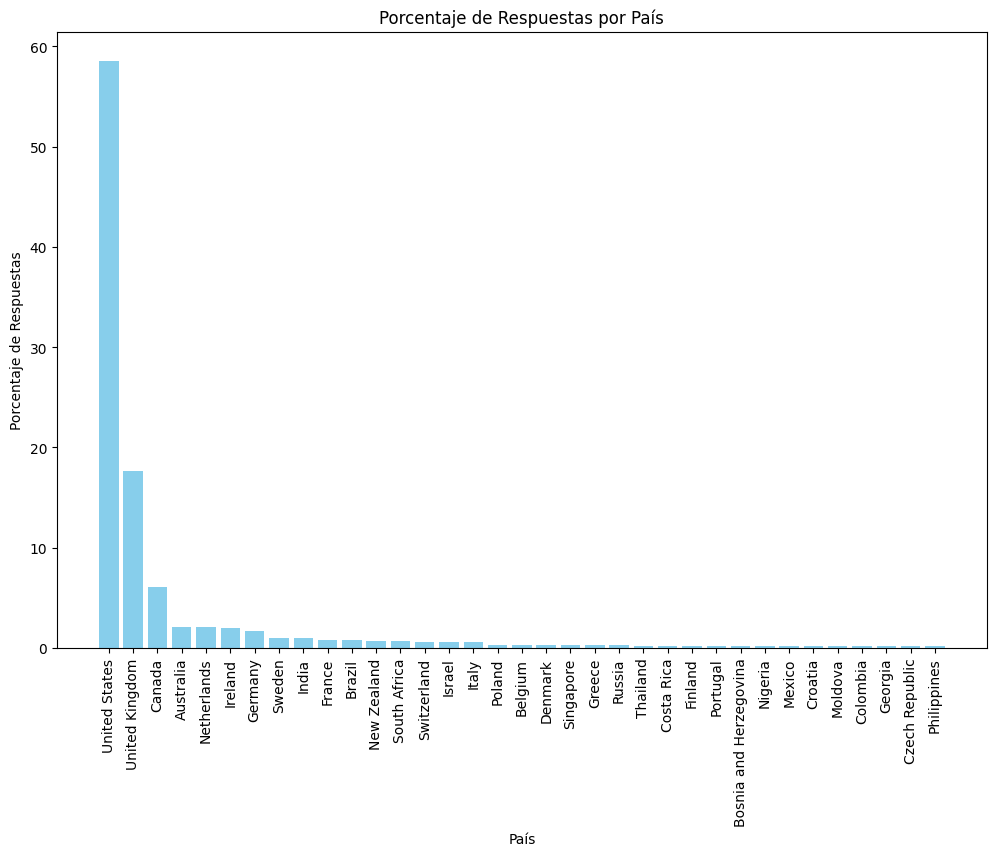

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
plt.bar(df_sorted['Country'], df_sorted['Percentage'], color='skyblue')
plt.xlabel('País')
plt.ylabel('Porcentaje de Respuestas')
plt.title('Porcentaje de Respuestas por País')
plt.xticks(rotation=90)
plt.show()

El país con mayor representación de la data es Estados Unidos con un 50% del total aproximadamente, luego Reino Unido con un 20%, seguido de Canadá con menos del 10%.

In [ ]:
import plotly.graph_objects as go
ocupaciones = ['Ama de casa', 'Estudiantes', 'Sector Corporativo', 'Otros', 'Negocios']
count = [65173, 60569, 60039, 51775, 49252]

# Crear gráfico de barras
fig = go.Figure([go.Bar(x=ocupaciones, y=count, marker_color='lightskyblue')])

# Personalizar el diseño
fig.update_layout(
    title='Distribución de ocupación de participantes',
    xaxis_title='Ocupación',
    yaxis_title='Número de participantes',
    font=dict(family="Arial, sans-serif", size=12, color="black"),
    title_font=dict(size=18),
    xaxis_tickangle=-45,
    bargap=0.2,
    margin=dict(l=50, r=50, t=80, b=50),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
)

# Añadir etiquetas de valor en las barras
for i in range(len(ocupaciones)):
    fig.add_annotation(x=ocupaciones[i], y=count[i],
                       text=str(count[i]), font=dict(color='black', size=12),
                       showarrow=False)

# Mostrar el gráfico
fig.show()

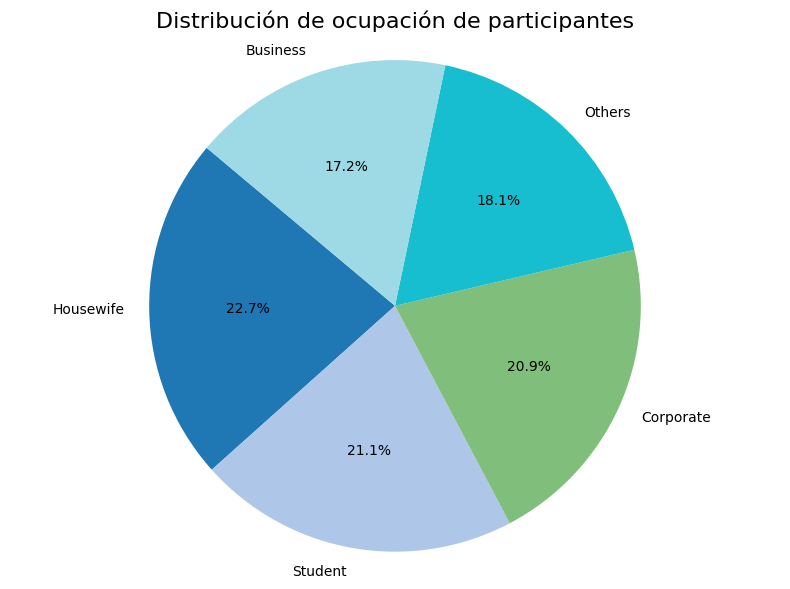

In [ ]:
# Datos
ocupaciones = ['Housewife', 'Student', 'Corporate', 'Others', 'Business']
count = [65173, 60569, 60039, 51775, 49252]

# Paleta de colores azules
colors = ['#1f77b4', '#aec7e8', '#7fbf7b', '#17becf', '#9edae5']

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(count, labels=ocupaciones, autopct='%1.1f%%', colors=colors, startangle=140)

# Personalizar el diseño
plt.title('Distribución de ocupación de participantes', fontsize=16)
plt.axis('equal')  # Asegurar que el gráfico de pastel sea circular

# Mostrar el gráfico
plt.tight_layout()
plt.show()

De acuerdo al gráfico se puede observar que hay una distribución proporcional para cada ocupación de las personas encuestadas.

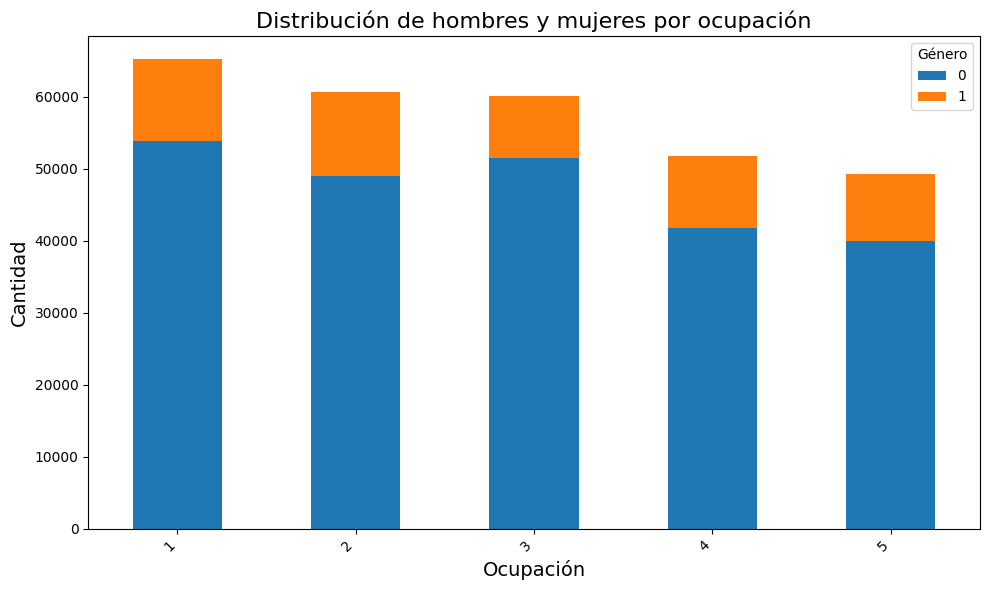

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df con tus datos

# Agrupar por ocupación y género, contar la cantidad de hombres y mujeres en cada grupo
grouped = df.groupby(['Occupation', 'Gender']).size().unstack()

# Crear el gráfico de barras apiladas
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar el diseño
plt.title('Distribución de hombres y mujeres por ocupación', fontsize=16)
plt.xlabel('Ocupación', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Filtrar el DataFrame para obtener solo las filas donde la ocupación sea "Housewife"
housewives = df[df['Occupation'] == 1]

# Contar la cantidad de hombres y mujeres en el grupo
gender_count = housewives['Gender'].value_counts()

# Mostrar los resultados
print("Cantidad de hombres y mujeres con la ocupación de Housewife:")
print(gender_count)

Cantidad de hombres y mujeres con la ocupación de Housewife:
Gender
0    53845
1    11328
Name: count, dtype: int64


In [ ]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,2014-08-27 11:37:59,1,United States,3,1,3,3,1,3,1,3,2,1,1,3,2,3
4,2014-08-27 11:43:36,1,United States,3,1,3,3,1,3,1,3,2,1,1,3,1,3
5,2014-08-27 11:49:51,1,Poland,3,1,1,3,1,3,1,3,2,1,1,3,2,2
6,2014-08-27 11:51:34,1,Australia,3,1,3,3,1,3,1,3,2,1,1,3,1,2
7,2014-08-27 11:52:41,1,United States,3,1,1,1,1,3,1,3,2,1,1,3,1,1


La ocupación y género muestra que hay más cantidad de hombres y mujeres con la ocupación de Housewifes, como la encuesta se hizco en el 2014 resulta extraño esta divisón.
No se tomará la variable género para el análisis, además, como la mayoría está registrado como hombre, no influirá en que haya tantas diferencias para ambos sexos.

In [278]:
df_new = df_new.drop(columns=['Gender'])

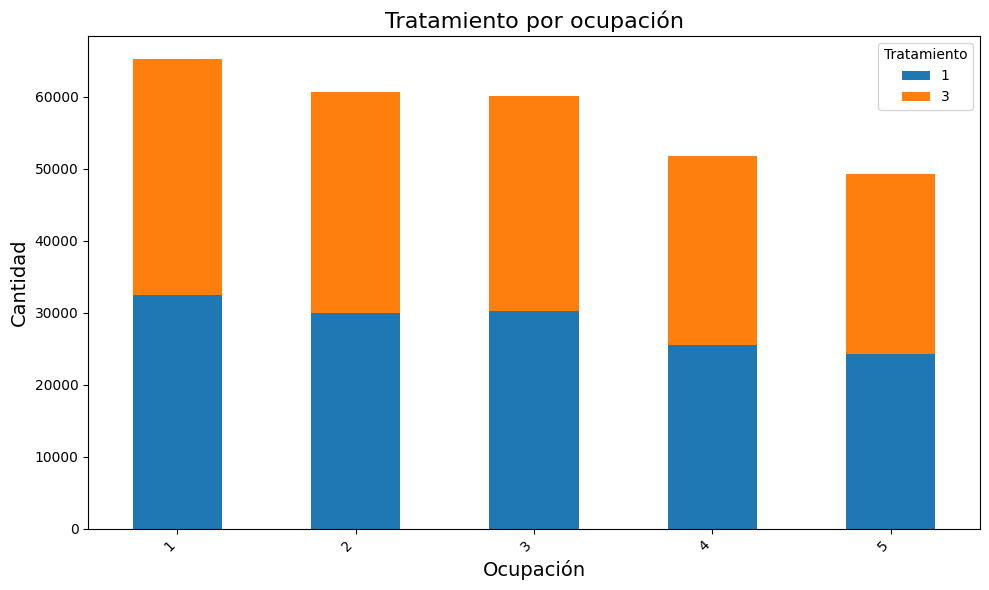

In [ ]:
grouped = df.groupby(['Occupation', 'treatment']).size().unstack().fillna(0)

# Crear el gráfico de barras apiladas
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Personalizar el diseño
plt.title('Tratamiento por ocupación', fontsize=16)
plt.xlabel('Ocupación', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tratamiento')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

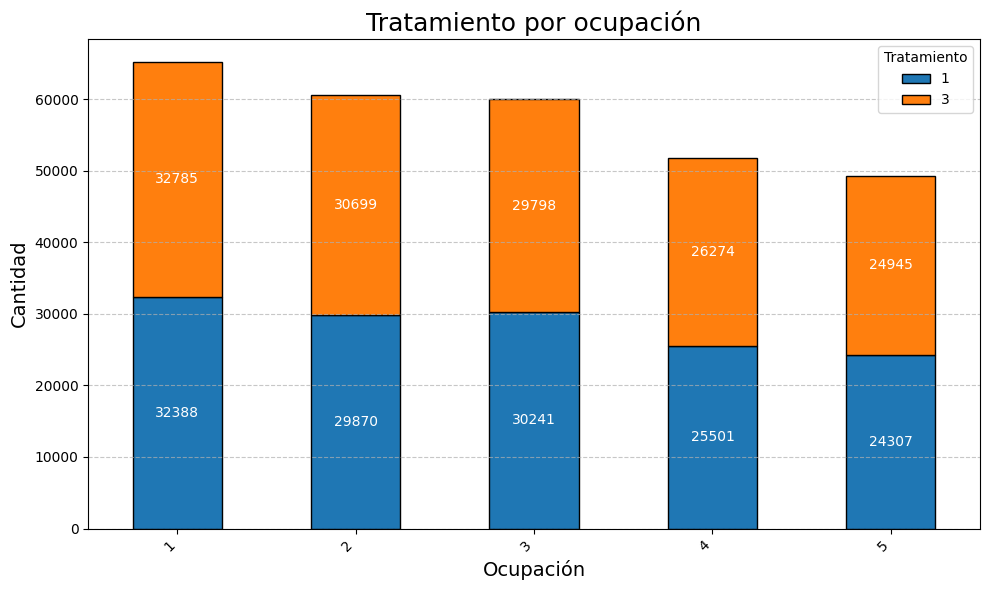

In [ ]:
# Agrupar los datos por ocupación y tratamiento
grouped = df.groupby(['Occupation', 'treatment']).size().unstack().fillna(0)

# Crear el gráfico de barras apiladas
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'], edgecolor='black')

# Añadir etiquetas de valor en las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='white')

# Personalizar el diseño
plt.title('Tratamiento por ocupación', fontsize=18)
plt.xlabel('Ocupación', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tratamiento')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

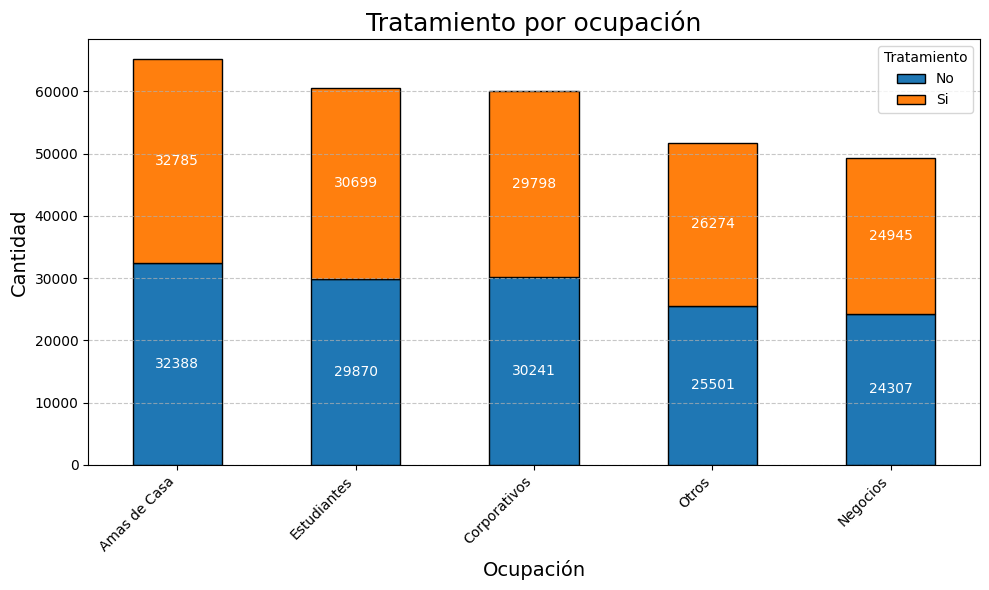

In [ ]:
# Agrupar los datos por ocupación y tratamiento
grouped = df.groupby(['Occupation', 'treatment']).size().unstack().fillna(0)

# Crear el gráfico de barras apiladas
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'], edgecolor='black')

# Añadir etiquetas de valor en las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='white')

# Personalizar el diseño
plt.title('Tratamiento por ocupación', fontsize=18)
plt.xlabel('Ocupación', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Cambiar las etiquetas del eje x (ocupaciones)
new_labels = ['Amas de Casa', 'Estudiantes', 'Corporativos', 'Otros', 'Negocios']
ax.set_xticklabels(new_labels)

# Cambiar las etiquetas de la leyenda (tratamiento)
handles, labels = ax.get_legend_handles_labels()
new_labels_legend = ['No', 'Si']
ax.legend(handles, new_labels_legend, title='Tratamiento')

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

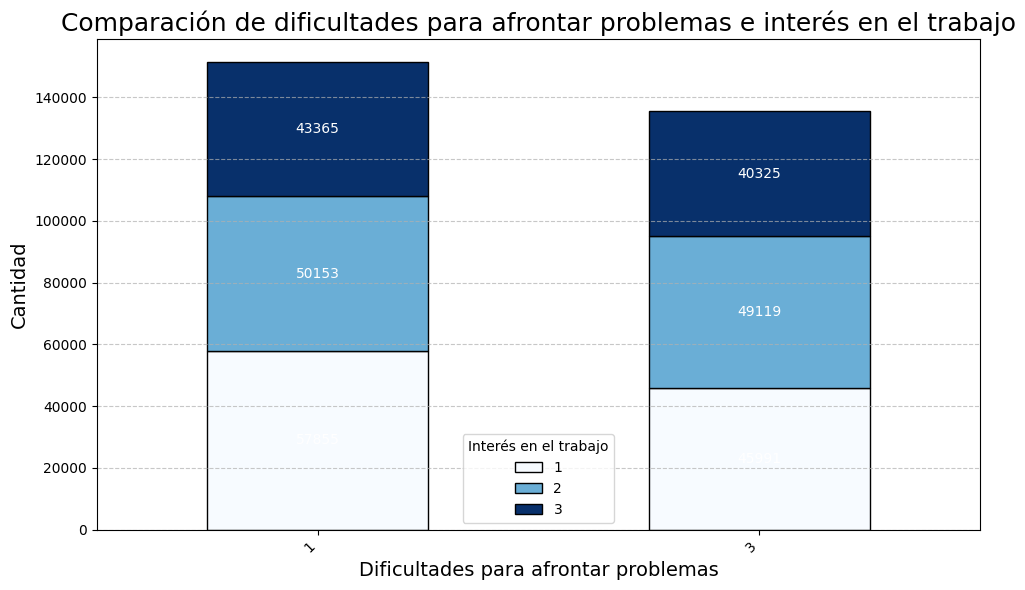

In [ ]:
# Agrupar los datos por 'Coping_Struggles' y 'Work_Interest'
grouped = df.groupby(['Coping_Struggles', 'Work_Interest']).size().unstack().fillna(0)

# Crear el gráfico de barras apiladas
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6), edgecolor='black', colormap='Blues')

# Añadir etiquetas de valor en las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='white')

# Personalizar el diseño
plt.title('Comparación de dificultades para afrontar problemas e interés en el trabajo', fontsize=18)
plt.xlabel('Dificultades para afrontar problemas', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Interés en el trabajo')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

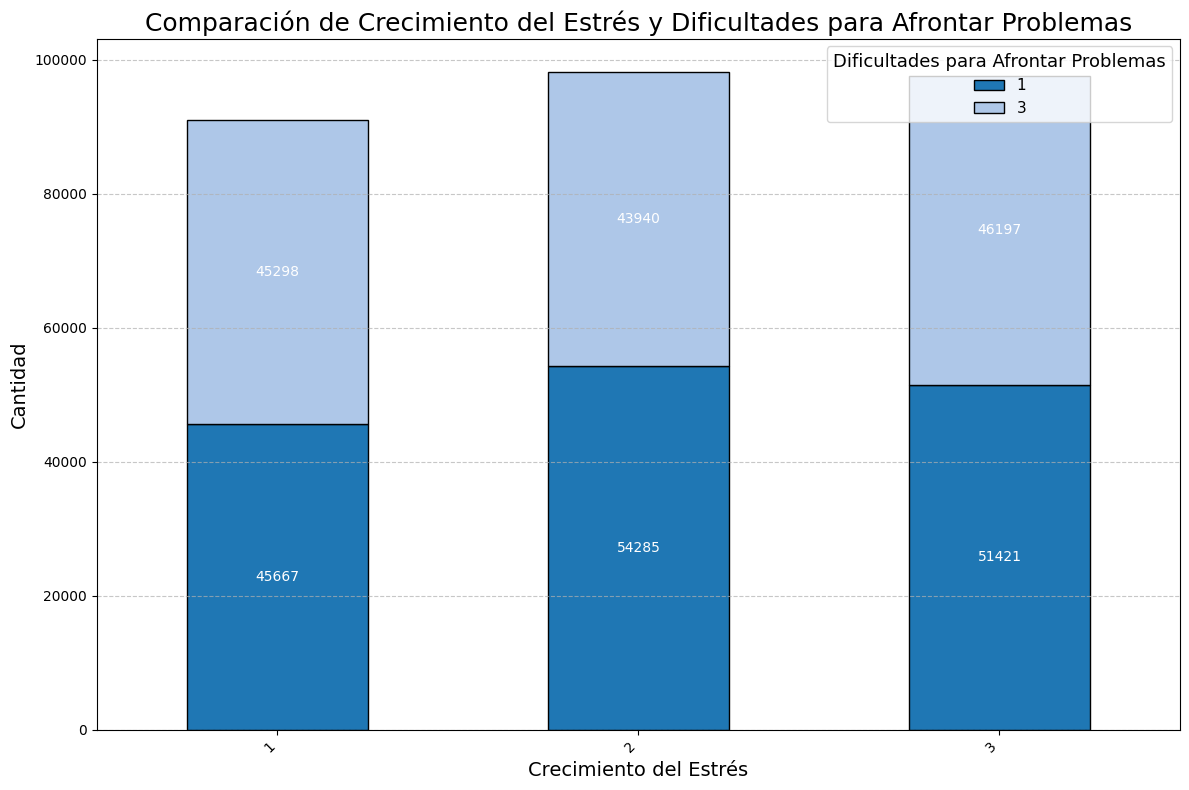

In [ ]:
grouped = df.groupby(['Growing_Stress', 'Coping_Struggles']).size().unstack().fillna(0)

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a']
grouped.plot(kind='bar', stacked=True, ax=ax, color=colors, edgecolor='black')

# Añadir etiquetas de valor en las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Solo agregar etiquetas si la altura de la barra es mayor que 0
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='white')

# Personalizar el diseño
ax.set_title('Comparación de Crecimiento del Estrés y Dificultades para Afrontar Problemas', fontsize=18)
ax.set_xlabel('Crecimiento del Estrés', fontsize=14)
ax.set_ylabel('Cantidad', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title='Dificultades para Afrontar Problemas', title_fontsize='13', fontsize='11')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

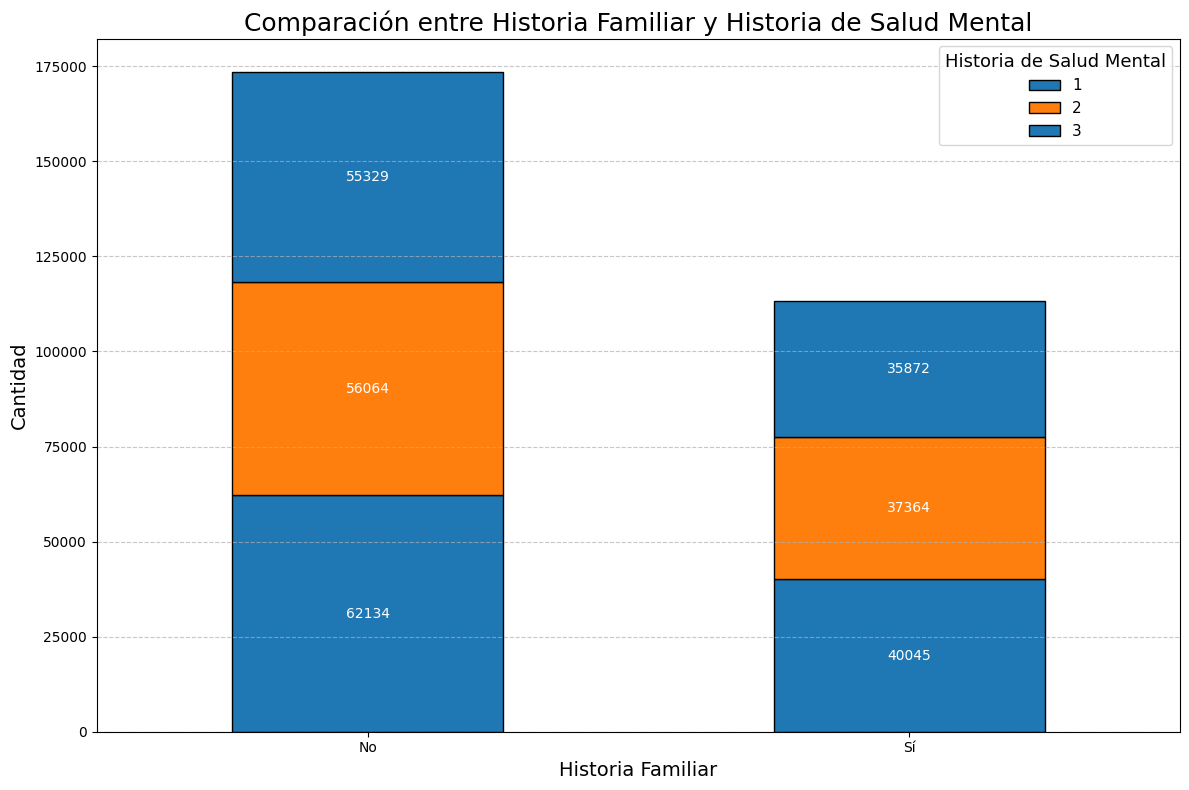

In [ ]:
grouped = df.groupby(['family_history', 'Mental_Health_History']).size().unstack().fillna(0)

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['#1f77b4', '#ff7f0e']  # Colores profesionales para el gráfico
grouped.plot(kind='bar', stacked=True, ax=ax, color=colors, edgecolor='black')

# Añadir etiquetas de valor en las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Solo agregar etiquetas si la altura de la barra es mayor que 0
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='white')

# Personalizar el diseño
ax.set_title('Comparación entre Historia Familiar y Historia de Salud Mental', fontsize=18)
ax.set_xlabel('Historia Familiar', fontsize=14)
ax.set_ylabel('Cantidad', fontsize=14)
ax.set_xticklabels(['No', 'Sí'], rotation=0, ha='center')  # Cambiar etiquetas del eje x
ax.legend(title='Historia de Salud Mental', title_fontsize='13', fontsize='11')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#5.Machine Learning

In [310]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286808 entries, 3 to 292363
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Country                  286808 non-null  object
 1   Occupation               286808 non-null  int64 
 2   self_employed            286808 non-null  int64 
 3   family_history           286808 non-null  int64 
 4   treatment                286808 non-null  int64 
 5   Days_Indoors             286808 non-null  int64 
 6   Growing_Stress           286808 non-null  int64 
 7   Changes_Habits           286808 non-null  int64 
 8   Mental_Health_History    286808 non-null  int64 
 9   Mood_Swings              286808 non-null  int64 
 10  Coping_Struggles         286808 non-null  int64 
 11  Work_Interest            286808 non-null  object
 12  Social_Weakness          286808 non-null  int64 
 13  mental_health_interview  286808 non-null  int64 
 14  care_options             

In [311]:
y = df_new['Coping_Struggles']
X = df_new.drop('Coping_Struggles', axis=1)

In [312]:
X

,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,United States,3,1,3,3,1,3,1,3,2,No,3,2,3
4,United States,3,1,3,3,1,3,1,3,2,No,3,1,3
5,Poland,3,1,1,3,1,3,1,3,2,No,3,2,2
6,Australia,3,1,3,3,1,3,1,3,2,No,3,1,2
7,United States,3,1,1,1,1,3,1,3,2,No,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,United States,5,3,3,3,2,1,2,1,1,No,2,2,2
292360,South Africa,5,1,3,3,2,1,2,1,1,No,2,1,3
292361,United States,5,1,3,1,2,1,2,1,1,No,2,1,1
292362,United States,5,1,3,3,2,1,2,1,1,No,2,1,3


In [309]:
y

3         1
4         1
5         1
6         1
7         1
         ..
292359    3
292360    3
292361    3
292362    3
292363    3
Name: Coping_Struggles, Length: 286808, dtype: int64

In [313]:
columnas_categoricas_nominales = ['Country', 'Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History','Work_Interest','Social_Weakness','mental_health_interview','care_options']
columnas_categoricas_ordinales = ['Mood_Swings']

In [314]:
one_hot_encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

In [315]:
col_transformer = make_column_transformer((make_pipeline(one_hot_encoder), columnas_categoricas_nominales),
                                          (make_pipeline(ordinal_encoder), columnas_categoricas_ordinales),


                        remainder = 'passthrough')

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Country', 'Occupation', 'self_employed',
                                  'family_history', 'treatment', 'Days_Indoors',
                                  'Growing_Stress', 'Changes_Habits',
                                  'Mental_Health_History', 'Work_Interest',
                                  'Social_Weakness', 'mental_health_interview',
                                  'care_options']),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Mood_Swings'])])

In [316]:
col_transformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Country', 'Occupation', 'self_employed',
                                  'family_history', 'treatment', 'Days_Indoors',
                                  'Growing_Stress', 'Changes_Habits',
                                  'Mental_Health_History', 'Work_Interest',
                                  'Social_Weakness', 'mental_health_interview',
                                  'care_options']),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Mood_Swings'])])

In [317]:
aux=col_transformer.transform(X)

In [318]:
# Convertir la matriz dispersa en un DataFrame de pandas
X_procesado = pd.DataFrame.sparse.from_spmatrix(aux, columns=col_transformer.get_feature_names_out())

# Verificar la información del DataFrame
X_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286808 entries, 0 to 286807
Data columns (total 73 columns):
 #   Column                                      Non-Null Count   Dtype             
---  ------                                      --------------   -----             
 0   pipeline-1__Country_Australia               286808 non-null  Sparse[float64, 0]
 1   pipeline-1__Country_Belgium                 286808 non-null  Sparse[float64, 0]
 2   pipeline-1__Country_Bosnia and Herzegovina  286808 non-null  Sparse[float64, 0]
 3   pipeline-1__Country_Brazil                  286808 non-null  Sparse[float64, 0]
 4   pipeline-1__Country_Canada                  286808 non-null  Sparse[float64, 0]
 5   pipeline-1__Country_Colombia                286808 non-null  Sparse[float64, 0]
 6   pipeline-1__Country_Costa Rica              286808 non-null  Sparse[float64, 0]
 7   pipeline-1__Country_Croatia                 286808 non-null  Sparse[float64, 0]
 8   pipeline-1__Country_Czech Republic

In [319]:
X_procesado

,pipeline-1__Country_Australia,pipeline-1__Country_Belgium,pipeline-1__Country_Bosnia and Herzegovina,pipeline-1__Country_Brazil,pipeline-1__Country_Canada,pipeline-1__Country_Colombia,pipeline-1__Country_Costa Rica,pipeline-1__Country_Croatia,pipeline-1__Country_Czech Republic,pipeline-1__Country_Denmark,...,pipeline-1__Social_Weakness_1,pipeline-1__Social_Weakness_2,pipeline-1__Social_Weakness_3,pipeline-1__mental_health_interview_1,pipeline-1__mental_health_interview_2,pipeline-1__mental_health_interview_3,pipeline-1__care_options_1,pipeline-1__care_options_2,pipeline-1__care_options_3,pipeline-2__Mood_Swings
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
286804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
286805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
286806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [320]:
X_procesado = X_procesado.values

In [390]:
X_train, X_test, y_train, y_test = train_test_split(X_procesado , y ,test_size=0.3)

#Random Forest

In [391]:
rndf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rndf_class.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [392]:
rndf_class.score(X_train, y_train)

0.9948845665330113

In [393]:
y_pred = rndf_class.predict(X_test)

In [394]:
rndf_class.score(X_test, y_test)

0.9914810036842044

In [395]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99     45400
           3       0.99      0.99      0.99     40643

    accuracy                           0.99     86043
   macro avg       0.99      0.99      0.99     86043
weighted avg       0.99      0.99      0.99     86043



Conclusión:

- De acuerdo al modelo se observar que la variable Afrontamiento frente al estrés y presiones es predecida por las otras variables de la data en un 99%. Lo que quiere decir que el país, ocupación, si es independiente o no, la historia familia en salud mental, si ha recibido tratamiento anteriormente, si tiene cambio de hábitos ( en patrones de sueño, por ejemplo), si tiene cambios de humor, su interés en el trabajao, si tiene o dificultad para socializar, su disposición para dar una entrevista en salud mental y si es consciente o no de las opciones de autocuidado influyen en que la persona tena o no dificultades para lidirar con el estrés y presión.
- El entrenamiento tiene un 99% lo que significa que el modelo ha aprendido, y el test también es 99%, por lo tanto no hay overfiting.

1. Feature 72 (0.10524740454625328)
2. Feature 52 (0.04290301618081083)
3. Feature 56 (0.039414217732072966)
4. Feature 53 (0.03804838970968113)
5. Feature 51 (0.03795081168072956)
6. Feature 60 (0.03793432013756278)
7. Feature 61 (0.037862863860508585)
8. Feature 54 (0.036551454897526196)
9. Feature 48 (0.03635301721251627)
10. Feature 64 (0.03620944227184634)
11. Feature 62 (0.03620210419755654)
12. Feature 59 (0.036142140627901664)
13. Feature 55 (0.0356952722269254)
14. Feature 35 (0.0354802781656167)
15. Feature 57 (0.03541480796463154)
16. Feature 65 (0.03452469985524427)
17. Feature 58 (0.03404670430424853)
18. Feature 63 (0.0338616467041005)
19. Feature 37 (0.03351928695798237)
20. Feature 50 (0.03310058830984467)
21. Feature 36 (0.03239586609831443)
22. Feature 38 (0.031178563407687217)
23. Feature 49 (0.031074295772995215)
24. Feature 47 (0.03014239597955143)
25. Feature 46 (0.02996118778536754)
26. Feature 39 (0.02946485674188531)
27. Feature 43 (0.0014515671743052282)
28. F

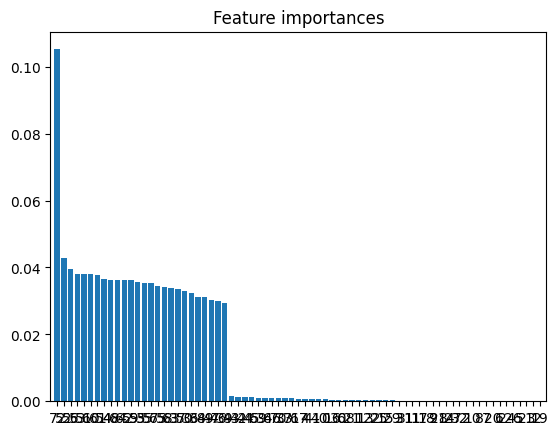

In [396]:
import numpy as np
import matplotlib.pyplot as plt

# Extraer las importancias de las variables
importances = rndf_class.feature_importances_

# Ordenar las importancias de las variables de manera descendente
indices = np.argsort(importances)[::-1]

# Imprimir la importancia de cada variable
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

# Opcional: Visualizar las importancias de las variables
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

1. Feature 72 (0.10524740454625328)
2. Feature 52 (0.04290301618081083)
3. Feature 56 (0.039414217732072966)
4. Feature 53 (0.03804838970968113)
5. Feature 51 (0.03795081168072956)
6. Feature 60 (0.03793432013756278)
7. Feature 61 (0.037862863860508585)
8. Feature 54 (0.036551454897526196)
9. Feature 48 (0.03635301721251627)
10. Feature 64 (0.03620944227184634)
11. Feature 62 (0.03620210419755654)
12. Feature 59 (0.036142140627901664)
13. Feature 55 (0.0356952722269254)
14. Feature 35 (0.0354802781656167)
15. Feature 57 (0.03541480796463154)
16. Feature 65 (0.03452469985524427)
17. Feature 58 (0.03404670430424853)
18. Feature 63 (0.0338616467041005)
19. Feature 37 (0.03351928695798237)
20. Feature 50 (0.03310058830984467)
21. Feature 36 (0.03239586609831443)
22. Feature 38 (0.031178563407687217)
23. Feature 49 (0.031074295772995215)
24. Feature 47 (0.03014239597955143)
25. Feature 46 (0.02996118778536754)
26. Feature 39 (0.02946485674188531)


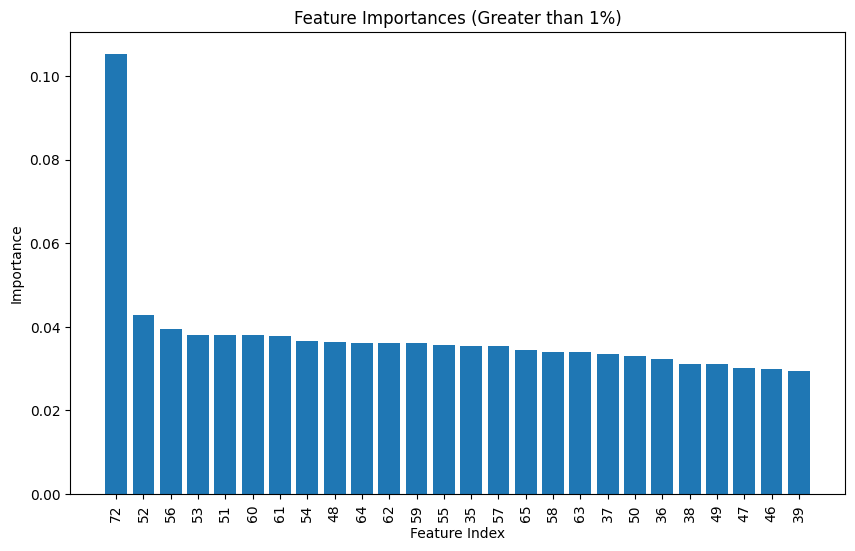

In [397]:
import numpy as np
import matplotlib.pyplot as plt

# Extraer las importancias de las variables
importances = rndf_class.feature_importances_

# Ordenar las importancias de las variables de manera descendente
indices = np.argsort(importances)[::-1]

# Filtrar las importancias que son mayores al 1%
significant_indices = indices[importances[indices] > 0.01]
significant_importances = importances[significant_indices]

# Imprimir la importancia de cada variable que tiene más del 1%
for i, index in enumerate(significant_indices):
    print(f"{i + 1}. Feature {index} ({significant_importances[i]})")

# Visualizar las importancias de las variables que tienen más del 1%
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Greater than 1%)")
plt.bar(range(len(significant_indices)), significant_importances, align="center")
plt.xticks(range(len(significant_indices)), significant_indices, rotation=90)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

1. Feature 'Mood_Swings' (0.10524740454625328)
2. Feature 'Growing_Stress_2' (0.04290301618081083)
3. Feature 'Changes_Habits_3' (0.039414217732072966)
4. Feature 'Growing_Stress_3' (0.03804838970968113)
5. Feature 'Growing_Stress_1' (0.03795081168072956)
6. Feature 'Work_Interest_Maybe' (0.03793432013756278)
7. Feature 'Work_Interest_No' (0.037862863860508585)
8. Feature 'Changes_Habits_1' (0.036551454897526196)
9. Feature 'Days_Indoors_3' (0.03635301721251627)
10. Feature 'Social_Weakness_2' (0.03620944227184634)
11. Feature 'Work_Interest_Yes' (0.03620210419755654)
12. Feature 'Mental_Health_History_3' (0.036142140627901664)
13. Feature 'Changes_Habits_2' (0.0356952722269254)
14. Feature 'Occupation_1' (0.0354802781656167)
15. Feature 'Mental_Health_History_1' (0.03541480796463154)
16. Feature 'Social_Weakness_3' (0.03452469985524427)
17. Feature 'Mental_Health_History_2' (0.03404670430424853)
18. Feature 'Social_Weakness_1' (0.0338616467041005)
19. Feature 'Occupation_3' (0.0335192

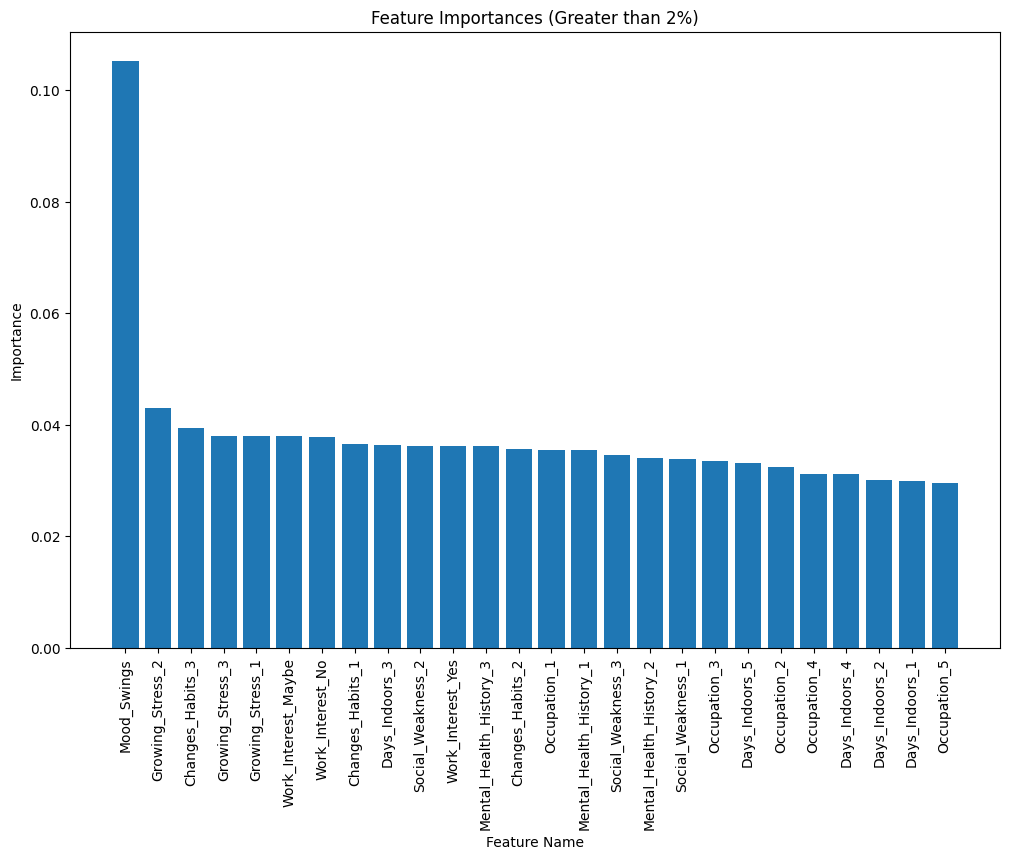

In [399]:
import numpy as np
import matplotlib.pyplot as plt

# Extraer las importancias de las variables
importances = rndf_class.feature_importances_

# Ordenar las importancias de las variables de manera descendente
indices = np.argsort(importances)[::-1]

# Filtrar las importancias que son mayores al 2%
significant_indices = indices[importances[indices] > 0.01]
significant_importances = importances[significant_indices]

# Obtener los nombres de las columnas originales
feature_names = [
    'Country_Australia', 'Country_Belgium', 'Country_Bosnia and Herzegovina',
    'Country_Brazil', 'Country_Canada', 'Country_Colombia', 'Country_Costa Rica',
    'Country_Croatia', 'Country_Czech Republic', 'Country_Denmark', 'Country_Finland',
    'Country_France', 'Country_Georgia', 'Country_Germany', 'Country_Greece',
    'Country_India', 'Country_Ireland', 'Country_Israel', 'Country_Italy',
    'Country_Mexico', 'Country_Moldova', 'Country_Netherlands', 'Country_New Zealand',
    'Country_Nigeria', 'Country_Philippines', 'Country_Poland', 'Country_Portugal',
    'Country_Russia', 'Country_Singapore', 'Country_South Africa', 'Country_Sweden',
    'Country_Switzerland', 'Country_Thailand', 'Country_United Kingdom',
    'Country_United States', 'Occupation_1', 'Occupation_2', 'Occupation_3',
    'Occupation_4', 'Occupation_5', 'self_employed_1', 'self_employed_3',
    'family_history_1', 'family_history_3', 'treatment_1', 'treatment_3',
    'Days_Indoors_1', 'Days_Indoors_2', 'Days_Indoors_3', 'Days_Indoors_4',
    'Days_Indoors_5', 'Growing_Stress_1', 'Growing_Stress_2', 'Growing_Stress_3',
    'Changes_Habits_1', 'Changes_Habits_2', 'Changes_Habits_3',
    'Mental_Health_History_1', 'Mental_Health_History_2', 'Mental_Health_History_3',
    'Work_Interest_Maybe', 'Work_Interest_No', 'Work_Interest_Yes', 'Social_Weakness_1',
    'Social_Weakness_2', 'Social_Weakness_3', 'mental_health_interview_1',
    'mental_health_interview_2', 'mental_health_interview_3', 'care_options_1',
    'care_options_2', 'care_options_3', 'Mood_Swings'
]

# Imprimir la importancia de cada variable que tiene más del 2%
for i, index in enumerate(significant_indices):
    print(f"{i + 1}. Feature '{feature_names[index]}' ({significant_importances[i]})")

# Visualizar las importancias de las variables que tienen más del 2%
plt.figure(figsize=(12, 8))
plt.title("Feature Importances (Greater than 2%)")
plt.bar(range(len(significant_indices)), significant_importances, align="center")
plt.xticks(range(len(significant_indices)), [feature_names[i] for i in significant_indices], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance")
plt.show()

Las variables que influyen en el 1% son:
- Mood Swings ( esta es la que tiene el mayor nivel predictivo con un 10%)
- Work interest
- Change habits
- Days Indoors
- Social Waekness
- Mental Health history
- Ocupation
- Days Indoor
- Growing Stress

Tarea analizar qué pasa si analizo solo con estas variables ¿cuánto será mi nivel de predicción?
Analizar por separado con las que faltan.

#Random forest sin historia familiar

In [337]:
df_new_nofa = df_new.drop(columns=['family_history'])

In [338]:
yf = df_new_nofa['Coping_Struggles']
Xf = df_new_nofa.drop('Coping_Struggles', axis=1)

In [363]:
Xf

,Country,Occupation,self_employed,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,United States,3,1,3,1,3,1,3,2,No,3,2,3
4,United States,3,1,3,1,3,1,3,2,No,3,1,3
5,Poland,3,1,3,1,3,1,3,2,No,3,2,2
6,Australia,3,1,3,1,3,1,3,2,No,3,1,2
7,United States,3,1,1,1,3,1,3,2,No,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,United States,5,3,3,2,1,2,1,1,No,2,2,2
292360,South Africa,5,1,3,2,1,2,1,1,No,2,1,3
292361,United States,5,1,1,2,1,2,1,1,No,2,1,1
292362,United States,5,1,3,2,1,2,1,1,No,2,1,3


In [347]:
columnas_categoricas_nominales_1 = ['Country', 'Occupation', 'self_employed', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History','Work_Interest','Social_Weakness','mental_health_interview','care_options']
columnas_categoricas_ordinales_1= ['Mood_Swings']

In [348]:
columnas_categoricas_nominales_1

['Country',
 'Occupation',
 'self_employed',
 'treatment',
 'Days_Indoors',
 'Growing_Stress',
 'Changes_Habits',
 'Mental_Health_History',
 'Work_Interest',
 'Social_Weakness',
 'mental_health_interview',
 'care_options']

In [349]:
one_hot_encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

In [350]:
col_transformer = make_column_transformer((make_pipeline(one_hot_encoder), columnas_categoricas_nominales_1),
                                          (make_pipeline(ordinal_encoder), columnas_categoricas_ordinales_1),


                        remainder = 'passthrough')

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Country', 'Occupation', 'self_employed',
                                  'treatment', 'Days_Indoors', 'Growing_Stress',
                                  'Changes_Habits', 'Mental_Health_History',
                                  'Work_Interest', 'Social_Weakness',
                                  'mental_health_interview', 'care_options']),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Mood_Swings'])])

In [351]:
col_transformer.fit(Xf)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Country', 'Occupation', 'self_employed',
                                  'treatment', 'Days_Indoors', 'Growing_Stress',
                                  'Changes_Habits', 'Mental_Health_History',
                                  'Work_Interest', 'Social_Weakness',
                                  'mental_health_interview', 'care_options']),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Mood_Swings'])])

In [353]:
aux=col_transformer.transform(Xf)

In [354]:
# Convertir la matriz dispersa en un DataFrame de pandas
Xf_procesado = pd.DataFrame.sparse.from_spmatrix(aux, columns=col_transformer.get_feature_names_out())

# Verificar la información del DataFrame
Xf_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286808 entries, 0 to 286807
Data columns (total 71 columns):
 #   Column                                      Non-Null Count   Dtype             
---  ------                                      --------------   -----             
 0   pipeline-1__Country_Australia               286808 non-null  Sparse[float64, 0]
 1   pipeline-1__Country_Belgium                 286808 non-null  Sparse[float64, 0]
 2   pipeline-1__Country_Bosnia and Herzegovina  286808 non-null  Sparse[float64, 0]
 3   pipeline-1__Country_Brazil                  286808 non-null  Sparse[float64, 0]
 4   pipeline-1__Country_Canada                  286808 non-null  Sparse[float64, 0]
 5   pipeline-1__Country_Colombia                286808 non-null  Sparse[float64, 0]
 6   pipeline-1__Country_Costa Rica              286808 non-null  Sparse[float64, 0]
 7   pipeline-1__Country_Croatia                 286808 non-null  Sparse[float64, 0]
 8   pipeline-1__Country_Czech Republic

In [355]:
Xf_procesado = Xf_procesado.values

PCA sin variable historial familiar

In [356]:
pca=PCA()
pca.fit(Xf_procesado)
Xf_procesado_pca=pca.transform(Xf_procesado)
Xf_procesado_pca=pd.DataFrame(Xf_procesado_pca,columns=pca.get_feature_names_out())
Xf_procesado_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286808 entries, 0 to 286807
Data columns (total 71 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   pca0    286808 non-null  float64
 1   pca1    286808 non-null  float64
 2   pca2    286808 non-null  float64
 3   pca3    286808 non-null  float64
 4   pca4    286808 non-null  float64
 5   pca5    286808 non-null  float64
 6   pca6    286808 non-null  float64
 7   pca7    286808 non-null  float64
 8   pca8    286808 non-null  float64
 9   pca9    286808 non-null  float64
 10  pca10   286808 non-null  float64
 11  pca11   286808 non-null  float64
 12  pca12   286808 non-null  float64
 13  pca13   286808 non-null  float64
 14  pca14   286808 non-null  float64
 15  pca15   286808 non-null  float64
 16  pca16   286808 non-null  float64
 17  pca17   286808 non-null  float64
 18  pca18   286808 non-null  float64
 19  pca19   286808 non-null  float64
 20  pca20   286808 non-null  float64
 21  pca21   28

In [357]:
pca=PCA(0.99)
pca.fit(Xf_procesado)
Xf_procesado_pca=pca.transform(Xf_procesado)
Xf_procesado_pca=pd.DataFrame(Xf_procesado_pca,columns=pca.get_feature_names_out())
Xf_procesado_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286808 entries, 0 to 286807
Data columns (total 34 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   pca0    286808 non-null  float64
 1   pca1    286808 non-null  float64
 2   pca2    286808 non-null  float64
 3   pca3    286808 non-null  float64
 4   pca4    286808 non-null  float64
 5   pca5    286808 non-null  float64
 6   pca6    286808 non-null  float64
 7   pca7    286808 non-null  float64
 8   pca8    286808 non-null  float64
 9   pca9    286808 non-null  float64
 10  pca10   286808 non-null  float64
 11  pca11   286808 non-null  float64
 12  pca12   286808 non-null  float64
 13  pca13   286808 non-null  float64
 14  pca14   286808 non-null  float64
 15  pca15   286808 non-null  float64
 16  pca16   286808 non-null  float64
 17  pca17   286808 non-null  float64
 18  pca18   286808 non-null  float64
 19  pca19   286808 non-null  float64
 20  pca20   286808 non-null  float64
 21  pca21   28

In [358]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf_procesado_pca,yf,test_size=0.3)

In [359]:
rndf_class_f = RandomForestClassifier(n_estimators=100, random_state=42)
rndf_class_f.fit(Xf_train, yf_train)

RandomForestClassifier(random_state=42)

In [360]:
rndf_class_f.score(Xf_train, yf_train)

0.9946106143999203

In [361]:
y_pred_f = rndf_class_f.predict(Xf_test)

In [362]:
rndf_class_f.score(Xf_test, yf_test)

0.9921434631521449

In [365]:
from sklearn.metrics import classification_report
report = classification_report(yf_test, y_pred_f)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99     45411
           3       0.99      0.99      0.99     40632

    accuracy                           0.99     86043
   macro avg       0.99      0.99      0.99     86043
weighted avg       0.99      0.99      0.99     86043



Conclusión:
- Se observa que el nivel de predicción es practicamente el mismo cuando se tiene la variable historial familiar en desordenes mentales que no tener la variable
- En este sentido la variable podría ser obviada y no afectaría el porcentaje de predicción; es decir, la variabilidad de las otras variables predice si la persona tiene o no dificultades para el estrés. Por lo tanto, no es relevante y podría ser obviada. Esto es relevante, pues de esta manera también se genera menor estigmatización para las personas que tienen familiar con historial clínico familiar.

#Random Forest sin historia propia de salud mental

In [367]:
df_new_h = df_new.drop(columns=['Mental_Health_History'])

In [368]:
yh = df_new_h['Coping_Struggles']
Xh = df_new_h.drop('Coping_Struggles', axis=1)

In [372]:
columnas_categoricas_nominales_2 = ['Country', 'Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits','Work_Interest','Social_Weakness','mental_health_interview','care_options']
columnas_categoricas_ordinales_2 = ['Mood_Swings']

In [373]:
columnas_categoricas_nominales_2

['Country',
 'Occupation',
 'self_employed',
 'family_history',
 'treatment',
 'Days_Indoors',
 'Growing_Stress',
 'Changes_Habits',
 'Work_Interest',
 'Social_Weakness',
 'mental_health_interview',
 'care_options']

In [374]:
one_hot_encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

In [375]:
col_transformer = make_column_transformer((make_pipeline(one_hot_encoder), columnas_categoricas_nominales_2),
                                          (make_pipeline(ordinal_encoder), columnas_categoricas_ordinales_2),


                        remainder = 'passthrough')

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Country', 'Occupation', 'self_employed',
                                  'family_history', 'treatment', 'Days_Indoors',
                                  'Growing_Stress', 'Changes_Habits',
                                  'Work_Interest', 'Social_Weakness',
                                  'mental_health_interview', 'care_options']),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Mood_Swings'])])

In [376]:
col_transformer.fit(Xh)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Country', 'Occupation', 'self_employed',
                                  'family_history', 'treatment', 'Days_Indoors',
                                  'Growing_Stress', 'Changes_Habits',
                                  'Work_Interest', 'Social_Weakness',
                                  'mental_health_interview', 'care_options']),
                                ('pipeline-2',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Mood_Swings'])])

In [377]:
aux=col_transformer.transform(Xh)

In [378]:
# Convertir la matriz dispersa en un DataFrame de pandas
Xh_procesado = pd.DataFrame.sparse.from_spmatrix(aux, columns=col_transformer.get_feature_names_out())

# Verificar la información del DataFrame
Xh_procesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286808 entries, 0 to 286807
Data columns (total 70 columns):
 #   Column                                      Non-Null Count   Dtype             
---  ------                                      --------------   -----             
 0   pipeline-1__Country_Australia               286808 non-null  Sparse[float64, 0]
 1   pipeline-1__Country_Belgium                 286808 non-null  Sparse[float64, 0]
 2   pipeline-1__Country_Bosnia and Herzegovina  286808 non-null  Sparse[float64, 0]
 3   pipeline-1__Country_Brazil                  286808 non-null  Sparse[float64, 0]
 4   pipeline-1__Country_Canada                  286808 non-null  Sparse[float64, 0]
 5   pipeline-1__Country_Colombia                286808 non-null  Sparse[float64, 0]
 6   pipeline-1__Country_Costa Rica              286808 non-null  Sparse[float64, 0]
 7   pipeline-1__Country_Croatia                 286808 non-null  Sparse[float64, 0]
 8   pipeline-1__Country_Czech Republic

In [380]:
Xh_procesado = Xh_procesado.values

In [381]:
pca=PCA()
pca.fit(Xh_procesado)
Xh_procesado_pca=pca.transform(Xh_procesado)
Xh_procesado_pca=pd.DataFrame(Xh_procesado_pca,columns=pca.get_feature_names_out())
Xh_procesado_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286808 entries, 0 to 286807
Data columns (total 70 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   pca0    286808 non-null  float64
 1   pca1    286808 non-null  float64
 2   pca2    286808 non-null  float64
 3   pca3    286808 non-null  float64
 4   pca4    286808 non-null  float64
 5   pca5    286808 non-null  float64
 6   pca6    286808 non-null  float64
 7   pca7    286808 non-null  float64
 8   pca8    286808 non-null  float64
 9   pca9    286808 non-null  float64
 10  pca10   286808 non-null  float64
 11  pca11   286808 non-null  float64
 12  pca12   286808 non-null  float64
 13  pca13   286808 non-null  float64
 14  pca14   286808 non-null  float64
 15  pca15   286808 non-null  float64
 16  pca16   286808 non-null  float64
 17  pca17   286808 non-null  float64
 18  pca18   286808 non-null  float64
 19  pca19   286808 non-null  float64
 20  pca20   286808 non-null  float64
 21  pca21   28

In [382]:
pca=PCA(0.99)
pca.fit(Xh_procesado)
Xh_procesado_pca=pca.transform(Xh_procesado)
Xh_procesado_pca=pd.DataFrame(Xh_procesado_pca,columns=pca.get_feature_names_out())
Xh_procesado_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286808 entries, 0 to 286807
Data columns (total 33 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   pca0    286808 non-null  float64
 1   pca1    286808 non-null  float64
 2   pca2    286808 non-null  float64
 3   pca3    286808 non-null  float64
 4   pca4    286808 non-null  float64
 5   pca5    286808 non-null  float64
 6   pca6    286808 non-null  float64
 7   pca7    286808 non-null  float64
 8   pca8    286808 non-null  float64
 9   pca9    286808 non-null  float64
 10  pca10   286808 non-null  float64
 11  pca11   286808 non-null  float64
 12  pca12   286808 non-null  float64
 13  pca13   286808 non-null  float64
 14  pca14   286808 non-null  float64
 15  pca15   286808 non-null  float64
 16  pca16   286808 non-null  float64
 17  pca17   286808 non-null  float64
 18  pca18   286808 non-null  float64
 19  pca19   286808 non-null  float64
 20  pca20   286808 non-null  float64
 21  pca21   28

In [383]:
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh_procesado_pca,yh,test_size=0.3)

In [384]:
rndf_class_h = RandomForestClassifier(n_estimators=100, random_state=42)
rndf_class_h.fit(Xh_train, yh_train)

RandomForestClassifier(random_state=42)

In [385]:
rndf_class_h.score(Xh_train, yh_train)

0.9874131447214405

In [386]:
yh_pred = rndf_class_h.predict(Xh_test)

In [387]:
rndf_class_h.score(Xh_test, yh_test)

0.9804865009355788

In [388]:
from sklearn.metrics import classification_report
report = classification_report(yh_test, yh_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98     45197
           3       0.98      0.98      0.98     40846

    accuracy                           0.98     86043
   macro avg       0.98      0.98      0.98     86043
weighted avg       0.98      0.98      0.98     86043



Conclusión:
Tiene un alto nivel de predicción las variables para ver como predicen el estrés